In [27]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

%matplotlib inline

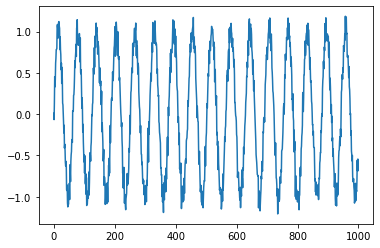

In [28]:
N = 1000
series = np.sin(0.1 * np.arange(N)) + np.random.randn(N) * 0.1

plt.plot(series)
plt.show()

In [29]:
T = 10
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t + T]
    X.append(x)
    
    y = series[t + T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)

N = len(X)

In [30]:
X.shape, Y.shape

((990, 10), (990, 1))

In [31]:
model = nn.Linear(T, 1)

In [32]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.1)

In [33]:
X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[N//2:].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
y_test = torch.from_numpy(Y[N//2:].astype(np.float32))

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([495, 10]),
 torch.Size([495, 1]),
 torch.Size([495, 10]),
 torch.Size([495, 1]))

In [35]:
def full_gd(model, 
           criterion, 
           optimizer, 
           X_train, 
           y_train, 
           X_test,
           y_test, 
           epochs=200):
    
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
        
    for epoch in range(epochs):
        optimizer.zero_grad()
        
        outputs = model(X_train)
        loss = criterion(y_train, outputs)
        
        loss.backward()
        optimizer.step()
        
        train_losses[epoch] = loss.item()
        
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses[epoch] = test_loss.item()
        
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")
    return train_losses, test_losses

In [36]:
train_losses, test_losses = full_gd(model, criterion, optimizer, X_train, y_train, X_test, y_test)

Epoch 1/200, Train Loss: 0.8571, Test Loss: 0.3054
Epoch 2/200, Train Loss: 0.2989, Test Loss: 0.4126
Epoch 3/200, Train Loss: 0.4165, Test Loss: 0.4326
Epoch 4/200, Train Loss: 0.4374, Test Loss: 0.2856
Epoch 5/200, Train Loss: 0.2879, Test Loss: 0.1464
Epoch 6/200, Train Loss: 0.1471, Test Loss: 0.1121
Epoch 7/200, Train Loss: 0.1131, Test Loss: 0.1520
Epoch 8/200, Train Loss: 0.1542, Test Loss: 0.1723
Epoch 9/200, Train Loss: 0.1752, Test Loss: 0.1311
Epoch 10/200, Train Loss: 0.1338, Test Loss: 0.0620
Epoch 11/200, Train Loss: 0.0640, Test Loss: 0.0195
Epoch 12/200, Train Loss: 0.0211, Test Loss: 0.0274
Epoch 13/200, Train Loss: 0.0291, Test Loss: 0.0632
Epoch 14/200, Train Loss: 0.0653, Test Loss: 0.0859
Epoch 15/200, Train Loss: 0.0882, Test Loss: 0.0778
Epoch 16/200, Train Loss: 0.0799, Test Loss: 0.0538
Epoch 17/200, Train Loss: 0.0555, Test Loss: 0.0400
Epoch 18/200, Train Loss: 0.0413, Test Loss: 0.0474
Epoch 19/200, Train Loss: 0.0486, Test Loss: 0.0644
Epoch 20/200, Train L

Epoch 164/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 165/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 166/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 167/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 168/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 169/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 170/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 171/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 172/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 173/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 174/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 175/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 176/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 177/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 178/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 179/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 180/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 181/200, Train Loss: 0.0147, Test Loss: 0.0136
Epoch 182/200, Train Loss: 0.0147, Test Loss: 

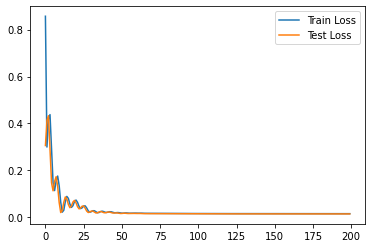

In [37]:
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.show()

In [42]:
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
# 1-D array of length T
last_x = torch.from_numpy(X[-N//2].astype(np.float32))

while len(validation_predictions) < len(validation_target):
    input_ = last_x.view(1, -1)
    p = model(input_)
    # [0, 0] # 1x1 array -> scaler
    
    # update the predictions list
    validation_predictions.append(p[0, 0].item())
    
    # make the new input
    last_x = torch.cat((last_x[1:], p[0]))

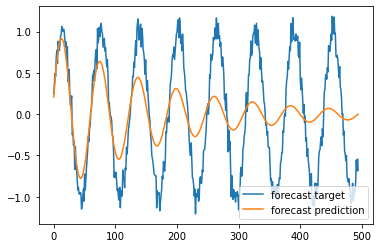

In [43]:
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast prediction")
plt.legend()
plt.show()